# Información.

Integrantes: Noir Nicolás, González Ignacio

Materia: Minería de datos

Año: 2024



----------------
------------
-----------------

# Librerías

In [1]:
# !pip install gap-stat

In [2]:
!pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.manifold import Isomap
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from mpl_toolkits.mplot3d import Axes3D
import warnings
from scipy.sparse import SparseEfficiencyWarning
from pandas.errors import SettingWithCopyWarning
warnings.simplefilter('ignore',SparseEfficiencyWarning)
warnings.simplefilter('ignore',SettingWithCopyWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

-----------
---------
------------

### 1. Descargar un conjunto de datos, dxCropRecommendation.csv1, para realizar el trabajo práctico.

In [4]:
df_crop = pd.read_csv('https://github.com/nacho-gonz/MdD-TUIA-2024/raw/master/TP/dxCropRecommendation.csv')

-----------------
----------
----------

### 2. Analizar los atributos del conjunto de datos (distribuciones, valores, outliers, tipos de datos, etc.) y elegir un método de estandarización.

In [5]:
# Observamos los tipos de datos, la cantidad de nulos y las variables del dataset.
df_crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogeno    1600 non-null   int64  
 1   Fosforo      1600 non-null   int64  
 2   Potasio      1600 non-null   int64  
 3   Temperatura  1600 non-null   float64
 4   Humedad      1600 non-null   float64
 5   pH           1600 non-null   float64
 6   Lluvia       1600 non-null   float64
 7   Cultivo      1600 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 100.1+ KB


In [6]:
# Observamos las distribuciones de las variables explicativas y la presencia de outliers.
df_crop.describe()

,Nitrogeno,Fosforo,Potasio,Temperatura,Humedad,pH,Lluvia
count,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000,1600.000000
mean,52.003750,53.145000,57.455625,25.627031,75.299276,6.474024,104.126884
std,35.697954,37.949247,56.440856,5.384785,20.534713,0.658380,56.235890
min,0.000000,5.000000,5.000000,8.825675,14.258040,4.507524,20.211267
25%,23.000000,22.750000,25.000000,22.481574,63.675620,6.034347,66.697864
50%,39.000000,47.000000,40.000000,25.662093,82.281131,6.423214,97.318949
75%,86.000000,71.000000,53.000000,28.568738,91.337228,6.873499,117.947585
max,120.000000,145.000000,205.000000,43.675493,99.981876,8.868741,298.560117


In [7]:
# Dividimos el dataset, sacando la variable de salida, y lo escalamos, ya que al observar la
# distribución notamos que hay una gran diferencia entre los rangos de valores de cada variable.
df_crop_sin_cat = df_crop.drop(columns=['Cultivo'])
min_max_scaler = MinMaxScaler().set_output(transform='pandas')
df_crop_sin_cat_min_max = min_max_scaler.fit_transform(df_crop_sin_cat)

--------------------
-------------
-----------

### 3. Realizar PCA y determinar el número de componentes principales considerando alguno de los 3 criterios datos en la práctica. Graficar la varianza acumulada y las componentes de PCA en un grafico 2 o 3D con sus respectivas clases.

In [8]:
crop_pca = PCA(n_components=df_crop_sin_cat_min_max.shape[1])

pca_features = crop_pca.fit_transform(df_crop_sin_cat_min_max)

# Llevamos las componentes PCA a un dataframe y le añadimos la variable de salida para
# el posterior análisis y visualización del resultado.

pca_crop_df = pd.DataFrame(
    data=pca_features,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
pca_crop_df['tipo'] = df_crop['Cultivo']
pca_crop_df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,tipo
0,-0.232093,0.255008,0.112598,0.333884,-0.135342,0.024517,-0.023984,Arroz
1,-0.168854,0.221820,0.089032,0.430496,-0.091617,0.169809,-0.039509,Arroz
2,-0.117239,0.018905,0.167098,0.532235,-0.089986,0.335099,0.060841,Arroz
3,-0.252856,0.107721,0.178315,0.437931,-0.002492,0.122235,0.098430,Arroz
4,-0.229835,0.130960,0.142360,0.537567,-0.183214,0.258557,0.067684,Arroz


In [9]:
# Representamos los autovectores, que estan ordenados por la varianza que explican del dataset.

pd.DataFrame(crop_pca.components_, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'], index=['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7'])

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
X1,-0.387918,0.626350,0.663231,-0.077684,0.023782,-0.079955,-0.065854
X2,0.895618,0.220779,0.297148,0.034579,0.212896,-0.119599,-0.001880
X3,-0.207872,-0.180496,0.042310,0.144669,0.857950,-0.221040,0.341401
X4,0.051204,0.133967,-0.009126,-0.151043,-0.299699,0.016280,0.930833
X5,-0.028387,0.269184,-0.173206,0.913798,-0.164808,-0.176111,0.059418
X6,0.027382,0.302311,-0.155674,0.100948,0.273951,0.892516,0.042433
X7,-0.000378,-0.586996,0.644763,0.322195,-0.161250,0.320282,0.085585


In [10]:
# Creamos función para acumular la varianza
def acumular(numbers):
     sum = 0
     var_c = []
     for num in numbers:
        sum += num
        var_c.append(sum)
     return var_c

In [11]:
var_c = acumular(crop_pca.explained_variance_ratio_)
pca_rtd = pd.DataFrame({'Eigenvalues':crop_pca.explained_variance_, 'Proporción de variancia explicada':crop_pca.explained_variance_ratio_, 'Proporción acumulado de variancia explicada': var_c})
pca_rtd

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,0.151297,0.391478,0.391478
1,0.078267,0.202514,0.593992
2,0.065203,0.168712,0.762704
3,0.037346,0.096633,0.859337
4,0.023030,0.059589,0.918926
5,0.019566,0.050627,0.969553
6,0.011767,0.030447,1.000000


Según el criterio de la proporción de variancia acumulada (75% - 80%), decidimos que con las tres primeras PCA se puede abarcar la mayoría de la variabilidad del conjunto de datos. Usamos este criterio, ya que el criterio de Kaiser no podria ser utilizado, por ser los autovalores menores a 1.

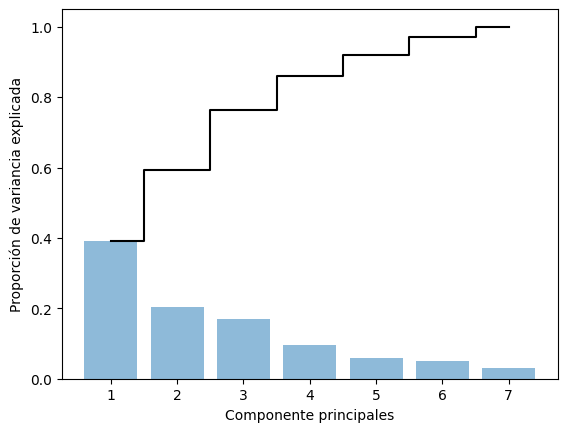

In [12]:
plt.bar(range(1,8), crop_pca.explained_variance_ratio_,
        alpha=0.5,
        align='center')
plt.step(range(1,8), np.cumsum(crop_pca.explained_variance_ratio_),
         where='mid',
         color='black')
plt.ylabel('Proporción de variancia explicada')
plt.xlabel('Componente principales')
plt.show()

Se observa que la proporción de varianza explicada acumulada de las tres primeras compontentes es del 0.75 - 0.8.

In [13]:
features = df_crop.drop(columns=['Cultivo']).columns.to_list()

loadings = crop_pca.components_.T * np.sqrt(crop_pca.explained_variance_)
fig = px.scatter(pca_features, x=0, y=1, color = pca_crop_df["tipo"],  labels={'color': 'tipo'})

for i, feature in enumerate(features):
    fig.add_shape(
        type='line',
        x0=0, y0=0,
        x1=loadings[i, 0]*4.5,
        y1=loadings[i, 1]*4.5
    )
    fig.add_annotation(
        x=loadings[i, 0]*5.5,
        y=loadings[i, 1]*5.5,
        ax=0, ay=0,
        xanchor='center',
        yanchor='bottom',
        text=feature,
    )
fig.update_layout(title = "Biplot",width = 1200,height = 600)
fig.show()
fig = px.scatter_3d(pca_features, x=0, y=1, z=2,
              color=pca_crop_df["tipo"],  labels={'color': 'tipo'})
fig.show()

Se observa que no se pueden diferenciar muy bien las categorias de diferentes tipos de cultivo, por ejemplo la sandía no se diferencia del melon, la lenteja del grano negro y arroz de la papaya. Nuestra hipótesis es que al tener valores parecidos en las variables, los agrupa en un único cluster.

--------
---------
---------

### 4. Aplicar Isomap y analizar los resultados obtenidos variando el numero de vecinos y  componentes. Realizar un grafico en 2D de utilizando dos componentes


In [14]:
df_crop_y = df_crop['Cultivo']

isomap_crop_2d = Isomap(n_neighbors=6, n_components=2)
isomap_crop_2d.fit(df_crop_sin_cat_min_max)

pred_isomap_2d = isomap_crop_2d.transform(df_crop_sin_cat_min_max)
pred_isomap_2d_df = pd.DataFrame(pred_isomap_2d,
 columns=['Component 1', 'Component 2'])

pred_isomap_2d_df['category'] = df_crop_y.to_numpy()

In [15]:
fig = px.scatter(pred_isomap_2d_df, x='Component 1', y='Component 2', color=pred_isomap_2d_df["category"],  labels={'color': 'category'})
fig.show()

Se puede visualizar que no son clusters perfectos, algunos están en una misma nube, otros tienen esta caracteristica en donde parece estar pellizcado el cluster. Por otro lado, según nuestras pruebas, los parámetros parecen los que mejor se adaptan al dataset

---
---
---

### 5. Aplicar t-SNE y analizar los resultados obtenidos variando el número de iteraciones,  componentes y perplejidad. Realizar un gráfico en 2D de utilizando dos componentes.

In [18]:
tsne_crop = TSNE(n_components=2, perplexity=40, n_iter=600, random_state=42)
tsne_crop_results = tsne_crop.fit_transform(df_crop_sin_cat_min_max)

In [34]:
subset_crop_TSNE = pd.DataFrame(df_crop_y)
subset_crop_TSNE['Component 1'] = tsne_crop_results[:,0]
subset_crop_TSNE['Component 2'] = tsne_crop_results[:,1]
fig = px.scatter(subset_crop_TSNE,x="Component 1", y="Component 2", color=subset_crop_TSNE["Cultivo"],  labels={'color': 'category'})
fig.show()

Se puede observar que a diferencia de ISOMAP los clusters estan separados, y aunque algunos conserven esta caracteristica de estar pellizcado, parece ser un clustering más robusto. Por otro lado, según nuestras pruebas, los parámetros parecen los que mejor se adaptan al dataset

#### Ahora, realizar un subconjunto de los datos considerando solo las frutas: Granada, Banana, Mango, Uva, Sandia, Melón, Manzana, Papaya y Coco.

6. Realizar nuevamente PCA y graficar las componentes de PCA en un gráfico 2D con sus
respectivas clases.

In [20]:
df_crop_y = df_crop_y.astype('str')
df_crop_compl = df_crop_sin_cat_min_max.copy()
df_crop_compl['Cultivo'] = df_crop_y

df_crop_sin_frutas = df_crop_compl.loc[df_crop_compl['Cultivo'].isin(['Granada', 'Banana', 'Mango', 'Uva', 'Sandia', 'Melon', 'Manzana', 'Papaya', 'Coco'])]

df_crop_sin_frutas_y = df_crop_sin_frutas['Cultivo']
df_crop_sin_frutas_sin_cat = df_crop_sin_frutas.drop(columns=['Cultivo'])
df_crop_sin_frutas_y = df_crop_sin_frutas_y.reset_index().drop(columns=['index'])

df_crop_sin_frutas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 900 entries, 500 to 1499
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogeno    900 non-null    float64
 1   Fosforo      900 non-null    float64
 2   Potasio      900 non-null    float64
 3   Temperatura  900 non-null    float64
 4   Humedad      900 non-null    float64
 5   pH           900 non-null    float64
 6   Lluvia       900 non-null    float64
 7   Cultivo      900 non-null    object 
dtypes: float64(7), object(1)
memory usage: 63.3+ KB


In [21]:
pca_sin_frutas = PCA(n_components=df_crop_sin_frutas_sin_cat.shape[1], random_state=42)

pca_features_sin_frutas = pca_sin_frutas.fit_transform(df_crop_sin_frutas_sin_cat)

pca_crop_sin_frutas_df = pd.DataFrame(
    data=pca_features_sin_frutas,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7'])
pca_crop_sin_frutas_df['tipo'] = df_crop_sin_frutas_y.astype('category')

In [22]:
var_c_sin_frutas = acumular(pca_sin_frutas.explained_variance_ratio_)
pca_rtd_sin_frutas = pd.DataFrame({'Eigenvalues':pca_sin_frutas.explained_variance_, 'Proporción de variancia explicada':pca_sin_frutas.explained_variance_ratio_, 'Proporción acumulado de variancia explicada': var_c_sin_frutas})
pca_rtd_sin_frutas

,Eigenvalues,Proporción de variancia explicada,Proporción acumulado de variancia explicada
0,0.226627,0.546868,0.546868
1,0.098449,0.237564,0.784432
2,0.030447,0.073470,0.857902
3,0.029631,0.071503,0.929405
4,0.016103,0.038857,0.968261
5,0.008797,0.021227,0.989488
6,0.004356,0.010512,1.000000


Elegimos 2 componentes PCA por el método del 75% ~ 80% de la proporción de variancia explicada acumulada.

In [23]:
fig_sin_frutas = px.scatter(pca_features_sin_frutas, x=0, y=1, color = pca_crop_sin_frutas_df["tipo"],  labels={'color': 'tipo'})
fig_sin_frutas.show()

Se observa que podría ser necesario graficar con una componente más, es decir una tercera dimensión, ya que aunque los clusters esten separados y un poco densos, se agrupan muchas frutas en un mismo cluster. No afirmo lo anterior, capaz la forma en que se categorizan las frutas puede ser no ideal y PCA tome la decisión de agrupar ciertas frutas que tienen características muy parecidas.

---
---
---

### 7. Aplicar K-means y analizar los resultados obtenidos variando el número de clusters y  obtener el número óptimo de clusters mediante GAP. Realizar un gráfico en 3D de utilizando tres atributos de los datos y donde los colores estén asociados a los clusters.

In [24]:
def calculate_wcss(X, n_clusters):
    """Calcula la suma de las distancias al cuadrado dentro de los clústeres (WCSS)."""
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    return np.sum(np.min(pairwise_distances(X, kmeans.cluster_centers_, metric='euclidean') ** 2, axis=1))

def gap_statistic(X, n_refs=10, max_clusters=15):
    """
    Calcula la estadística GAP para encontrar el número óptimo de clústeres.

    Parameters:
    - X: Conjunto de datos (matriz de características).
    - n_refs: Número de conjuntos de datos de referencia aleatorios.
    - max_clusters: Número máximo de clústeres para evaluar.

    Returns:
    - valores_gap: Lista de valores GAP para cada número de clústeres.
    - k_optimo: Número óptimo de clústeres según el método GAP.
    """
    # Crear matrices para guardar los resultados
    valores_gap = np.zeros(max_clusters)
    dispersión_ref = np.zeros((n_refs, max_clusters))

    # Calcular dispersión para los datos originales
    dispersión_obs = np.zeros(max_clusters)
    for k in range(1, max_clusters + 1):
        dispersión_obs[k - 1] = calculate_wcss(X, k)

    # Generar datos de referencia aleatorios y calcular dispersión para cada referencia
    for i in range(n_refs):
        X_ref = np.random.uniform(low=np.min(X, axis=0), high=np.max(X, axis=0), size=X.shape)
        for k in range(1, max_clusters + 1):
            dispersión_ref[i, k - 1] = calculate_wcss(X_ref, k)

    # Calcular el log de la media de la dispersión de las referencias
    log_disp_ref = np.log(np.mean(dispersión_ref, axis=0))

    # Calcular la estadística GAP
    valores_gap = log_disp_ref - np.log(dispersión_obs)

    # Encontrar el valor de K que maximiza la estadística GAP
    k_optimo = np.argmax(valores_gap) + 1

    return valores_gap, k_optimo

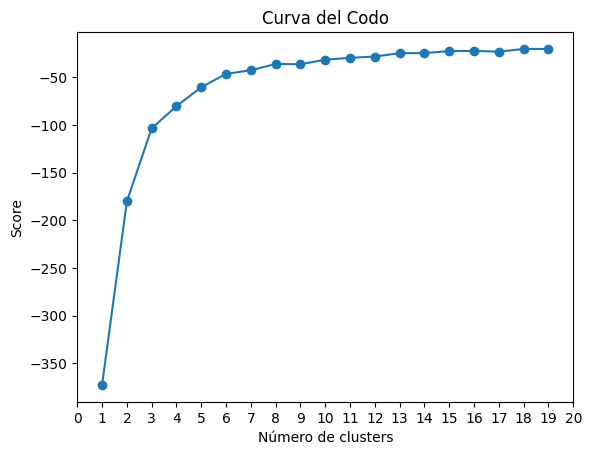

In [25]:
# Aplicamos Kmeans y la métrica de validación es la cohesión, por tema de implementación.

num_k = range(1, 20)
kmeans_list = [KMeans(n_clusters=i) for i in num_k]
score = [kmeans_list[i].fit(df_crop_sin_frutas_sin_cat).score(df_crop_sin_frutas_sin_cat) for i in range(len(kmeans_list))]

plt.plot(num_k,score, marker='o')
plt.xlabel('Número de clusters')
plt.xticks(range(21))
plt.ylabel('Score')
plt.title('Curva del Codo')
plt.show()

Se observa que en 6 clusters se encuentra la convergencia de la curva de codo de la cohesión de los clusters, es decir, la cantidad de clusters ideales para este dataset.

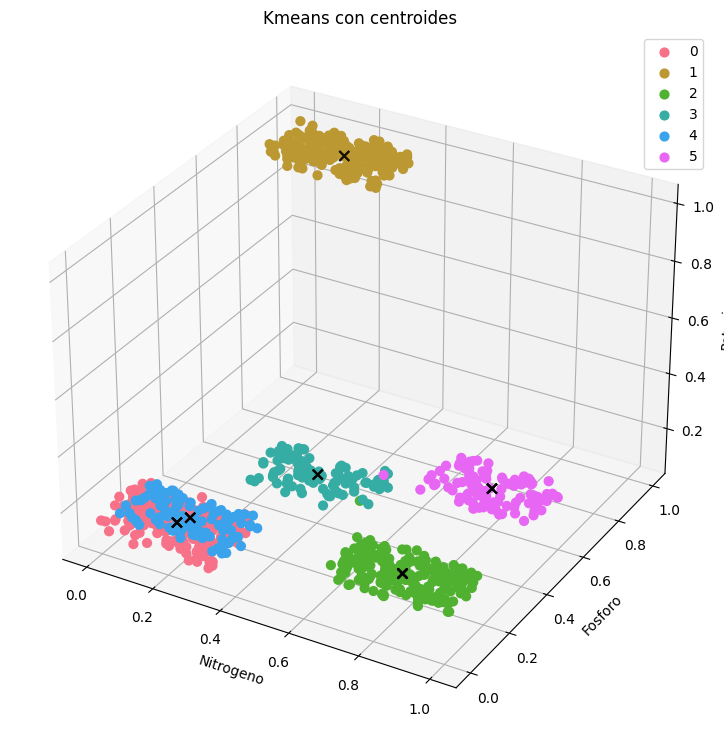

In [26]:
kmeans = KMeans(n_clusters=6, random_state=184).fit(df_crop_sin_frutas_sin_cat)
centroids = kmeans.cluster_centers_

centerClusters = kmeans.cluster_centers_

fig = plt.figure(figsize=(12, 7))
ax = Axes3D(fig, auto_add_to_figure=False, computed_zorder=False)
fig.add_axes(ax)

df_crop_sin_frutas['newClass'] = kmeans.predict(df_crop_sin_frutas_sin_cat)
labels = np.unique(df_crop_sin_frutas['newClass'])
palette = sns.color_palette("husl", len(labels))

for label, color in zip(labels, palette):
  df_crop_kmeans = df_crop_sin_frutas[df_crop_sin_frutas['newClass'] == label]
  ax.scatter(df_crop_kmeans['Nitrogeno'], df_crop_kmeans['Fosforo'], df_crop_kmeans['Potasio'], s=40, marker='o', color=color, alpha=1, label=label,zorder=1)
  ax.scatter(centerClusters[:, 0], centerClusters[:, 1], centerClusters[:, 2], marker='x', color='black', s=50, zorder=500)

ax.set_xlabel('Nitrogeno')
ax.set_ylabel('Fosforo')
ax.set_zlabel('Potasio')
ax.set_title('Kmeans con centroides')
ax.legend()
plt.show()

Observamos que en general parecen ser clusters densos y bien separados, excepto por 2 clusters que ocupan un mismo espacio.

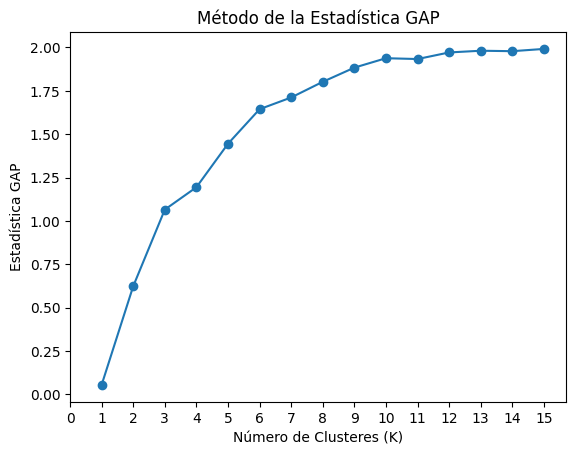

In [27]:
valores_gap, k_optimo = gap_statistic(df_crop_sin_frutas_sin_cat,n_refs=10,max_clusters=15)

plt.plot(range(1, len(valores_gap) + 1), valores_gap, marker='o')
plt.xlabel('Número de Clusteres (K)')
plt.ylabel('Estadística GAP')
plt.xticks(range(16))
plt.title('Método de la Estadística GAP')
plt.show()

In [28]:
print(f'El número óptimo de clusters según la estadística GAP es: {k_optimo}')

El número óptimo de clusters según la estadística GAP es: 15


Observamos que la estadística GAP aumenta siempre que aumente el número de clusters. Pero una vez pasado los 6/7 clusters esta mejora empieza a converger, entonces elegimos estos valores como k optimos. Aunque según GAP el número máximo que ingreses como max_clusters va a ser el k optimo según este dataset. (No se si es un tema de implementación o un tema de el dataset.)

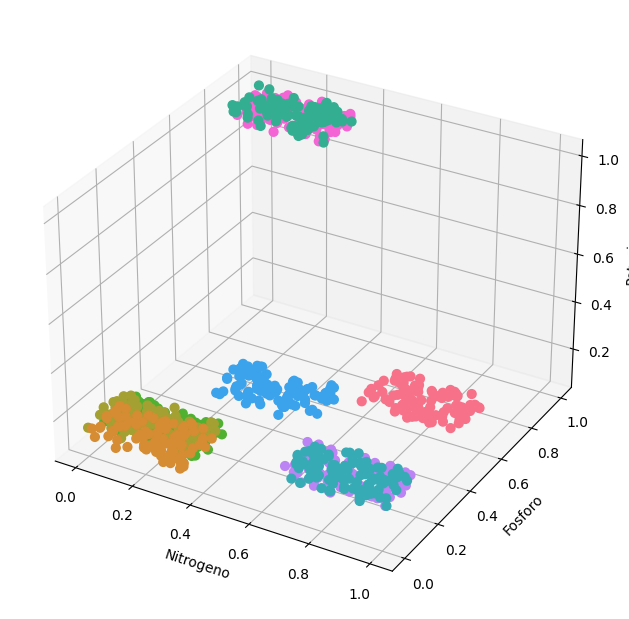

In [29]:
fig = plt.figure(figsize=(10, 6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
labels = np.unique(df_crop_sin_frutas['Cultivo'])
palette = sns.color_palette("husl", len(labels))
for label, color in zip(labels, palette):
  df1 = df_crop_sin_frutas[df_crop_sin_frutas['Cultivo'] == label]
  ax.scatter(df1['Nitrogeno'], df1['Fosforo'], df1['Potasio'], s=40, marker='o', color=color, alpha=1, label=label)

ax.set_xlabel('Nitrogeno')
ax.set_ylabel('Fosforo')
ax.set_zlabel('Potasio')
fig.show()

Observamos que Kmeans opto por unir algunas categorías dentro de un cluster, por su similaridad en las variables explicativas.

----------------------------
-------------------------------
------------------

### 8. Aplicar clustering jerárquico y determinar cuál número sería el que mejor represente los datos. Utilizar el score de Silhouette y calcular el número óptimo de cluster por medio de GAP.

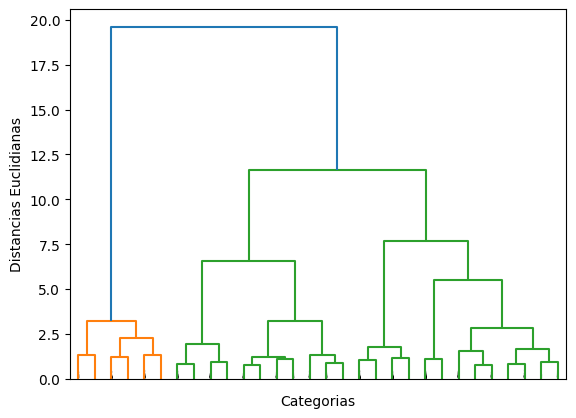

In [30]:
dendrogram = sch.dendrogram(sch.linkage(df_crop_sin_frutas_sin_cat, method = 'ward'),p=30,truncate_mode='lastp',show_leaf_counts = False, show_contracted = True)
plt.xlabel('Categorias')
plt.ylabel('Distancias Euclidianas')
plt.show()

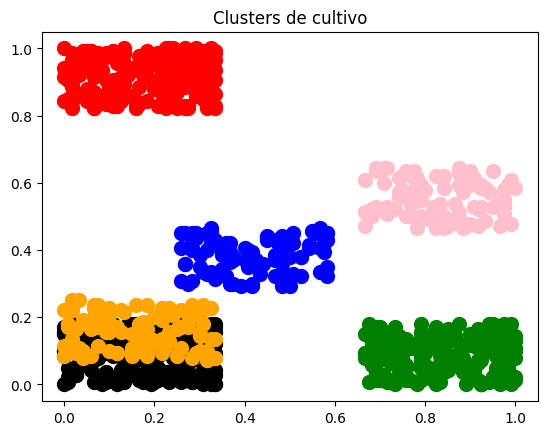

In [38]:
numpy_crop_features = df_crop_sin_frutas_sin_cat.values

hc = AgglomerativeClustering(n_clusters = 6, metric= 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(numpy_crop_features)

colores = ['red','blue','black','green','orange','pink']

for cluster in range(0,6):
  plt.scatter(numpy_crop_features[y_hc == cluster, 0], numpy_crop_features[y_hc == cluster, 1], s = 100, c = colores[cluster], label = f'Cluster {cluster+1}')

plt.title('Clusters de cultivo')
plt.show()

Observamos que tiene una forma de clustering muy parecida a Kmeans, siendo casi identicos los clusters. Podría ser de ayuda graficar esto en una tercera dimensión, más que nada por los clusters solapados en la parte inferior izquierda.

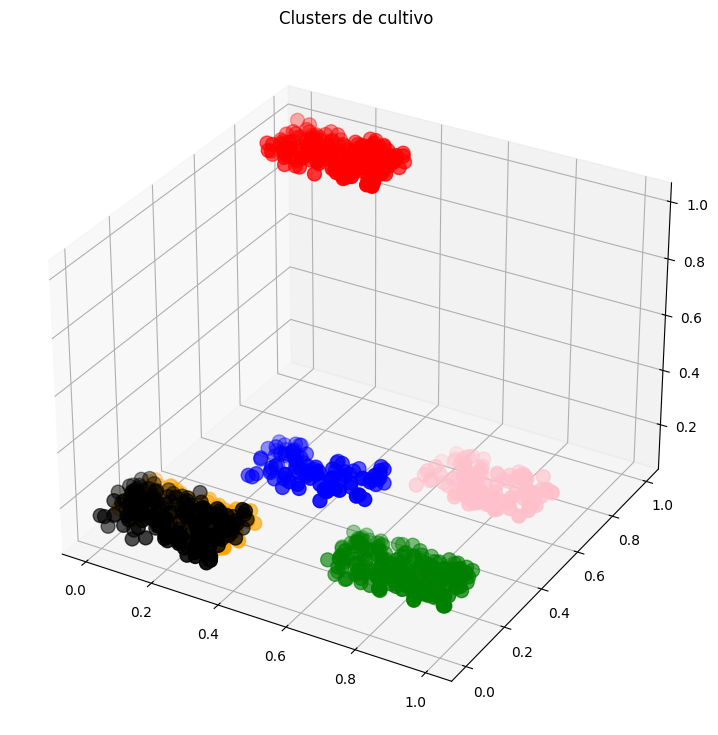

In [37]:
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

colores = ['red','blue','black','green','orange','pink']

for cluster in range(0, 6):
    ax.scatter(numpy_crop_features[y_hc == cluster, 0],
               numpy_crop_features[y_hc == cluster, 1],
               numpy_crop_features[y_hc == cluster, 2],
               s=100, c=colores[cluster], label=f'Cluster {cluster+1}')

ax.set_title('Clusters de cultivo')
plt.show()

Observamos que, como indicamos en el gráfico anterior, los clusters que estaban solapados tenian una pequeña diferencia en una tercer variable. Asimismo no notamos una gran diferencia en la visualización de los clusters en comparación con el visualizado 2D.

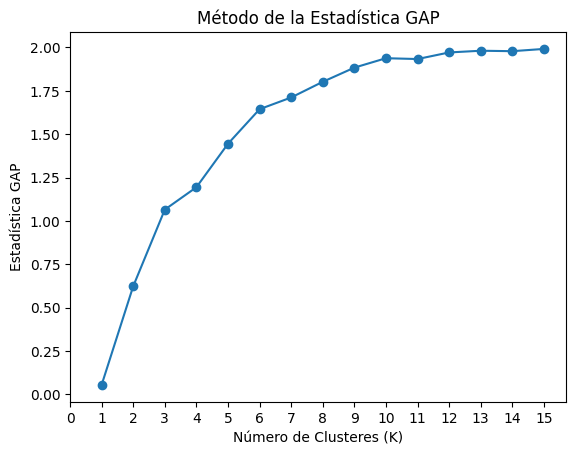

El mejor score de Silhouette en el Clustering jerárquico es de 0.55908 y es con 6 clusters


In [33]:
mejor_score = -1
mejor_k = 0

for n_clusters in range(2,21):
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
    preds = clusterer.fit_predict(numpy_crop_features)
    score_s = silhouette_score(numpy_crop_features, preds)
    if score_s > mejor_score:
        mejor_score = score_s
        mejor_k = n_clusters

score_gap, k_optimo_cj = gap_statistic(df_crop_sin_frutas_sin_cat,n_refs=10,max_clusters=15)

plt.plot(range(1, len(valores_gap) + 1), valores_gap, marker='o')
plt.xlabel('Número de Clusteres (K)')
plt.ylabel('Estadística GAP')
plt.xticks(range(16))
plt.title('Método de la Estadística GAP')
plt.show()

print(f'El mejor score de Silhouette en el Clustering jerárquico es de {round(mejor_score, 5)} y es con {mejor_k} clusters')

Según el coeficiente de Silhouette el número de clusters óptimo es 6 en el clustering jerárquico. Según GAP y nuestro análisis del gráfico anterior, el número de clusters óptimo es 6/7 para éste dataset.

---
---
---

# Conclusión.


En conclusion, en este trabajo aprendimos diversas tecnologias y métodos para la reduccion de dimenisonalidad, clusterización y posterior vizualicacion de los valores en planos 2d y 3d.

Dentro de estas, usamos PCA que es un algoritmo rápido, escalable pero que su desventaja es que no es tan robusto en la clusterización, además al ser tan sencillo no lleva ningún parámetro, es decir, siempre que tengas los mismos datos vas a obtener los mismos resultados. Luego usamos ISOMAP con el que se obtuvieron resultados ligeramente mejores en la clusterización, sus desventajas son que no es tán rapido y escalable, por su complejidad computacional, y no siempre tiene los mismos resultados, ya que se le pueden asignar 2 componentes, además algo que no tiene a diferencia de PCA es que desde su salida no se puede volver a los componentes originales, es decir, PCA tiene un número de componentes que mediante un calcula matricial, se pueden deducir las componentes originales. Después utilizamos t-SNE el cual tuvo resultados significativamente superiores, pero conlleva una mayor complejidad de parámetros siendo la perplejidad, la tasa de aprendizaje y el número de iteraciones, su complejidad computacional es elevada, también al igual que ISOMAP no puede volver a las componentes originales desde las componentes resultates.

Una vez realizadas las tecnicas de reducción de dimensionalidad es necesario agrupar las diferentes clases, para eso probamos 2 métodos, Kmeans y clustering jerarquico. El primer algoritmo que tiene como parámetro el número de clusters, que se traduce en la cantidad de centroides los cuales buscan optimizar las distancias hacia los datos y formar los mejores clusters. Este algoritmo por sí solo no es tan efectivo para saber el número ideal de clusters, entonces utilizamos 2 métricas que ayudan a la selección de la cantidad de clusters, siendo GAP y Silhouette. Este algoritmo con la ayuda de estas métricas tiene buenos resultados. El segundo tiene como parámetro la cantidad de clusters, la medida para el método de división y el método de división. Este algoritmo es un algoritmo aglomerativo, es decir, bottom up lo cual podría ser más costoso computacionalmente y no se aprovecha de la información global de los datos, como podría ser con el algoritmo divisivo. Al igual que el algoritmo anterior, este es usado a la par de las métricas GAP y Silhouette para conocer el número ideal de clusters.

Como idea final, en este trabajo observamos que todos estas herramientas necesitan ser usadas una con la otra, ya que por ejemplo, si utilizaramos Kmeans sin ningún método de reducción de dimensionalidad, este no podría ser visualizado y eventualmente evaluado en comparación con otras herramientas.